# Wrangle

Comprised of 2 parts: Acquisition and Preparation.

In Acquisition, the goal is to create functions that download the RT-IoT2022 dataset. In Preparation, I will conduct light analysis on the data in order to develop questions to be answered during a later stage.

## Acquisition
---

### Imports
I will be starting off with the basic imports of Pandas and NumPy

In [3]:
# Standard imports
import pandas as pd
import numpy as np

Additionally, I will define a random state of 42 for any time I need to work with a random state parameter.

In [6]:
# Define ranstate for random state
ranstate = 42

### Download

The first thing I need to do is to download the data. The data comes from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/942/rt-iot2022), and I need to develop or find a way to download it.

Looking on the page, it appears there is already documentation regarding importing using Python, so I will be using that.

In [9]:
# Install the necessary UC Irvine package
!pip install ucimlrepo

In [11]:
# Use the code provided to import the data:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
rt_iot2022 = fetch_ucirepo(id=942) 
  
# data (as pandas dataframes) 
X = rt_iot2022.data.features 
y = rt_iot2022.data.targets 
  
# metadata 
print(rt_iot2022.metadata) 
  
# variable information 
print(rt_iot2022.variables) 

{'uci_id': 942, 'name': 'RT-IoT2022 ', 'repository_url': 'https://archive.ics.uci.edu/dataset/942/rt-iot2022', 'data_url': 'https://archive.ics.uci.edu/static/public/942/data.csv', 'abstract': 'The RT-IoT2022, a proprietary dataset derived from a real-time IoT infrastructure, is introduced as a comprehensive resource integrating a diverse range of IoT devices and sophisticated network attack methodologies. This dataset encompasses both normal and adversarial network behaviours, providing a general representation of real-world scenarios.\nIncorporating data from IoT devices such as ThingSpeak-LED, Wipro-Bulb, and MQTT-Temp, as well as simulated attack scenarios involving Brute-Force SSH attacks, DDoS attacks using Hping and Slowloris, and Nmap patterns, RT-IoT2022 offers a detailed perspective on the complex nature of network traffic. The bidirectional attributes of network traffic are meticulously captured using the Zeek network monitoring tool and the Flowmeter plugin. Researchers can

### Examine the results
From these results, apparently a module or class object is created which holds all the data, plus some metadata concerning the dataset.

I need to examine this in depth and determine what my next steps will be.

In [14]:
rt_iot2022.data.features.columns

Index(['id.orig_p', 'id.resp_p', 'proto', 'service', 'flow_duration',
       'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
       'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot',
       'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count',
       'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
       'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count',
       'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',
       'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
       'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
       'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.tot',
       '

In [15]:
rt_iot2022.data.targets.value_counts()

Attack_type               
DOS_SYN_Hping                 94659
Thing_Speak                    8108
ARP_poisioning                 7750
MQTT_Publish                   4146
NMAP_UDP_SCAN                  2590
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  534
Wipro_bulb                      253
Metasploit_Brute_Force_SSH       37
NMAP_FIN_SCAN                    28
Name: count, dtype: int64

In [16]:
# Check that the target column doesn't exist in features provided
rt_iot2022.data.features.columns.isin(["Attack_type"]).sum()

0

In [17]:
# Concatenate the two datasets
df = pd.concat([rt_iot2022.data.features,rt_iot2022.data.targets],axis=1)
df.sample(10,random_state=ranstate)

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
76235,7315,21,tcp,-,0.000001,1,1,1,0,838860.800000,...,0.0,0.00,0.00,0.00,0.00,0.0,64,0,64,DOS_SYN_Hping
36557,18609,21,tcp,-,0.000004,1,1,1,0,262144.000000,...,0.0,0.00,0.00,0.00,0.00,0.0,64,0,64,DOS_SYN_Hping
84102,14663,21,tcp,-,0.000002,1,1,1,0,466033.777800,...,0.0,0.00,0.00,0.00,0.00,0.0,64,0,64,DOS_SYN_Hping
3245,37827,1883,tcp,mqtt,62.052435,9,5,3,3,0.145039,...,0.0,59819087.98,59819087.98,59819087.98,59819087.98,0.0,64240,26847,502,MQTT_Publish
114798,22348,21,tcp,-,0.000000,1,0,1,0,0.000000,...,0.0,0.00,0.00,0.00,0.00,0.0,64,0,64,DOS_SYN_Hping
98863,37150,21,tcp,-,0.000005,1,1,1,0,199728.761900,...,0.0,0.00,0.00,0.00,0.00,0.0,64,0,64,DOS_SYN_Hping
98982,36115,21,tcp,-,0.000005,1,1,1,0,199728.761900,...,0.0,0.00,0.00,0.00,0.00,0.0,64,0,64,DOS_SYN_Hping
60129,42253,21,tcp,-,0.000004,1,1,1,0,246723.764700,...,0.0,0.00,0.00,0.00,0.00,0.0,64,0,64,DOS_SYN_Hping
121828,36242,1334,tcp,-,0.000009,1,1,0,0,110376.421100,...,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024,NMAP_XMAS_TREE_SCAN
6700,49275,53,udp,dns,0.021367,2,2,2,2,93.601964,...,0.0,0.00,0.00,0.00,0.00,0.0,0,0,0,Thing_Speak


In [18]:
def acquire_iot2022():
    """
    Function to download and import the RT-IoT2022 dataset. Takes no parameters. Assumes the ucimlrepo has already been installed.
    
    Parameters:
    -----------
    - None
    
    Return:
    -------
    - Pandas DataFrame containing the RT IoT2022 information dataset
    - Dictionary object containing all RT IoT2022 data, including metadata.
    """
    try:
        from ucimlrepo import fetch_ucirepo 
        
        # Fetch dataset 
        rt_iot2022 = fetch_ucirepo(id=942)

        # Concatenate the two datasets
        df = pd.concat([rt_iot2022.data.features,rt_iot2022.data.targets],axis=1)

        return df.copy(),rt_iot2022
    
    except:
        print("Import failed due to 1 or more of the following reasons:\n\t - User is missing the UC Irvine Python package.\n\t - Dataset is no longer available at the queried location.\n\t - Some of the libraries in use have changed.")
    

## Preparation

The first thing I need to do is to test the function I have already built.

In [21]:
df, rt_data = acquire_iot2022()

In [22]:
df.sample(5,random_state=ranstate)

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
76235,7315,21,tcp,-,0.000001,1,1,1,0,838860.800000,...,0.0,0.00,0.00,0.00,0.00,0.0,64,0,64,DOS_SYN_Hping
36557,18609,21,tcp,-,0.000004,1,1,1,0,262144.000000,...,0.0,0.00,0.00,0.00,0.00,0.0,64,0,64,DOS_SYN_Hping
84102,14663,21,tcp,-,0.000002,1,1,1,0,466033.777800,...,0.0,0.00,0.00,0.00,0.00,0.0,64,0,64,DOS_SYN_Hping
3245,37827,1883,tcp,mqtt,62.052435,9,5,3,3,0.145039,...,0.0,59819087.98,59819087.98,59819087.98,59819087.98,0.0,64240,26847,502,MQTT_Publish
114798,22348,21,tcp,-,0.000000,1,0,1,0,0.000000,...,0.0,0.00,0.00,0.00,0.00,0.0,64,0,64,DOS_SYN_Hping


### Splitting the data
Now that I have verified it works, the next thing I need to do to split the data. The reason I am doing this is to manage potential biases I may have or develop during my research. I will split the data twice: once into the train and validate/test data, and then into the validate and and test data.

The train data is what I will actively be working on and focusing on. Any functions I develop will need to be able to work on the other datasets without issue. The validate data will be unseen information by myself and seen only by the computer in later modeling. The test data will not be seen until the very end of the project.

Before I begin to split the data, I'm going to import a function I've created in the past that shows me all sorts of information about the data.

In [25]:
def df_info(df,include=False,samples=1):
	"""
	Function takes a dataframe and returns potentially relevant information about it (including a sample)
	include=bool, default to False. To add the results from a describe method, pass True to the argument.
	samples=int, default to 1. Shows 1 sample by default, but can be modified to include more samples if desired.
	"""
		# create the df_inf dataframe
	df_inf = pd.DataFrame(index=df.columns,
			data = {
				'nunique':df.nunique()
				,'dtypes':df.dtypes
				,'isnull':df.isnull().sum()
			})
		# append samples based on input
	if samples >= 1:
		df_inf = df_inf.merge(df.sample(samples).iloc[0:samples].T,how='left',left_index=True,right_index=True)
		# append describe results if option selected
	if include == True:
		return df_inf.merge(df.describe(include='all').T,how='left',left_index=True,right_index=True)
	elif include == False:
		return df_inf
	else:
		print('Value passed to "include" argument is invalid.')

In [26]:
df_info(df)

,nunique,dtypes,isnull,42036
id.orig_p,65478,int64,0,24088
id.resp_p,1809,int64,0,21
proto,3,object,0,tcp
service,10,object,0,-
flow_duration,16381,float64,0,0.000001
...,...,...,...,...
idle.std,1001,float64,0,0.0
fwd_init_window_size,20,int64,0,64
bwd_init_window_size,56,int64,0,0
fwd_last_window_size,109,int64,0,64


Unfortunately, it appears the data has too many features that my function won't show any useful information, so I need to approach this a different way.

Most importantly, I need to verify that my data has no null values (as is described online), and I need to check each data type.

In [28]:
df.isnull().sum().sum()

0

The isnull() method shows True/False of each entry in the database, so by adding one sum() method, I limit what's being shown to just the columns. Another sum() method chained onto the end limits me to a 0, telling me that there are no null values.

In [30]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 84 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id.orig_p                 123117 non-null  int64  
 1   id.resp_p                 123117 non-null  int64  
 2   proto                     123117 non-null  object 
 3   service                   123117 non-null  object 
 4   flow_duration             123117 non-null  float64
 5   fwd_pkts_tot              123117 non-null  int64  
 6   bwd_pkts_tot              123117 non-null  int64  
 7   fwd_data_pkts_tot         123117 non-null  int64  
 8   bwd_data_pkts_tot         123117 non-null  int64  
 9   fwd_pkts_per_sec          123117 non-null  float64
 10  bwd_pkts_per_sec          123117 non-null  float64
 11  flow_pkts_per_sec         123117 non-null  float64
 12  down_up_ratio             123117 non-null  float64
 13  fwd_header_size_tot       123117 non-null  i

Looking through this, I can see that almost all my values are integers or floats, with the exception of "proto" and "service". I can also disregard "Attack_type" since that's my target variable.

I need to see what sort of values I am working with in these two features.

In [32]:
df.proto.value_counts()

proto
tcp     110427
udp      12633
icmp        57
Name: count, dtype: int64

In [33]:
df.service.value_counts()

service
-         102861
dns         9753
mqtt        4132
http        3464
ssl         2663
ntp          121
dhcp          50
irc           43
ssh           28
radius         2
Name: count, dtype: int64

Looking at these, I understand a little more of what I'm looking at. When encoding later, it may be advantageous to encode these into categorical numerics rather than to split these into separate features.

Now I've got a decent look at things, it's time to split the data up.

In [35]:
# import train_test_split function to execute the split
from sklearn.model_selection import train_test_split

In [36]:
# Isolate the train test
train, val_test = train_test_split(
    df,
    train_size=0.6,
    test_size=0.4,
    random_state=ranstate,
    stratify=df.Attack_type
)

In [37]:
# verify the sizes
print(train.shape)
print(val_test.shape)

(73870, 84)
(49247, 84)


In [38]:
# Check the distribution of the stratified variable for the train dataset
train.Attack_type.value_counts(normalize=True)

Attack_type
DOS_SYN_Hping                 0.768851
Thing_Speak                   0.065859
ARP_poisioning                0.062948
MQTT_Publish                  0.033681
NMAP_UDP_SCAN                 0.021037
NMAP_XMAS_TREE_SCAN           0.016326
NMAP_OS_DETECTION             0.016245
NMAP_TCP_scan                 0.008136
DDOS_Slowloris                0.004332
Wipro_bulb                    0.002058
Metasploit_Brute_Force_SSH    0.000298
NMAP_FIN_SCAN                 0.000230
Name: proportion, dtype: float64

In [39]:
# Check the distribution of the stratified variable for the val_test data
val_test.Attack_type.value_counts(normalize=True)

Attack_type
DOS_SYN_Hping                 0.768859
Thing_Speak                   0.065852
ARP_poisioning                0.062948
MQTT_Publish                  0.033667
NMAP_UDP_SCAN                 0.021037
NMAP_XMAS_TREE_SCAN           0.016326
NMAP_OS_DETECTION             0.016245
NMAP_TCP_scan                 0.008143
DDOS_Slowloris                0.004345
Wipro_bulb                    0.002051
Metasploit_Brute_Force_SSH    0.000305
NMAP_FIN_SCAN                 0.000223
Name: proportion, dtype: float64

Everything looks good so far! I can see that the Attack type is almost the same distribution, which is a great sign I did it right!

In [41]:
# Separate out the validate and test datasets
validate, test = train_test_split(
    val_test,
    train_size=0.6,
    test_size=0.4,
    random_state=ranstate,
    stratify=val_test.Attack_type
)

In [42]:
# Check the shapes of the datasets
print(validate.shape)
print(test.shape)

(29548, 84)
(19699, 84)


In [43]:
# Check the distribution of the validate target variable
validate.Attack_type.value_counts(normalize=True)

Attack_type
DOS_SYN_Hping                 0.768851
Thing_Speak                   0.065859
ARP_poisioning                0.062948
MQTT_Publish                  0.033674
NMAP_UDP_SCAN                 0.021017
NMAP_XMAS_TREE_SCAN           0.016312
NMAP_OS_DETECTION             0.016245
NMAP_TCP_scan                 0.008156
DDOS_Slowloris                0.004332
Wipro_bulb                    0.002064
Metasploit_Brute_Force_SSH    0.000305
NMAP_FIN_SCAN                 0.000237
Name: proportion, dtype: float64

In [44]:
# Check the distribution of the test target variable
test.Attack_type.value_counts(normalize=True)

Attack_type
DOS_SYN_Hping                 0.768872
Thing_Speak                   0.065841
ARP_poisioning                0.062947
MQTT_Publish                  0.033657
NMAP_UDP_SCAN                 0.021067
NMAP_XMAS_TREE_SCAN           0.016346
NMAP_OS_DETECTION             0.016244
NMAP_TCP_scan                 0.008122
DDOS_Slowloris                0.004366
Wipro_bulb                    0.002031
Metasploit_Brute_Force_SSH    0.000305
NMAP_FIN_SCAN                 0.000203
Name: proportion, dtype: float64

Examining these two datasets, they look just about identical to what I saw before, so everything is distributed correctly.

Now let's turn this into an executable function to use later.

In [46]:
def data_split(df,ranstate):
    """
    Function to split the given DataFrame. Returns three DataFrames containing the split data.
    
    Parameters:
    -----------
    - df: DataFrame
        The set of data to be split up
    - ranstate: Integer
        An integer value to define the random state
    
    Return:
    -------
    - train: DataFrame
    - validate: DataFrame
    - test: DataFrame
    
    """
    
    # Use a copy of the dataset instead of the data itself
    copy = df.copy()
    
    # Split into the train and val_test sets
    train, val_test = train_test_split(
        copy,
        train_size=0.6,
        test_size=0.4,
        random_state=ranstate,
        stratify=copy.Attack_type
    )
    
    # Split the val_test into validate and test sets
    validate, test = train_test_split(
        val_test,
        train_size=0.6,
        test_size=0.4,
        random_state=ranstate,
        stratify=val_test.Attack_type
    )
    
    return train, validate, test

In [47]:
# test the newly created function
train, validate, test = data_split(df, ranstate)

print(train.shape)
print(validate.shape)
print(test.shape)

(73870, 84)
(29548, 84)
(19699, 84)


### Variable identification

I need to understand what these variables are measuring and how to interpret them. I need to understand their correlation with the target variable as well. From these I will begin to assemble an initial data dictionary.

| Feature | Type | Data Type | Description |
|---------|------|-----------|-------------|
| id.orig_p | Integer | Integer | The network port used by the origin source |
| id.resp_p | Integer | Integer | The network port used by the responding device |
| proto | Categorical | Object | The protocol utilized in the connection |
| service | Continuous | Object | The type of service used in the connection |
| flow_duration | Continuous | Float | How long the connection lasted between devices |
| fwd_pkts_tot | Integer | Integer | Total packets forwarded in the session |
| bwd_pkts_tot | Integer | Integer | Total packets backward (returned) in the session |
| fwd_data_pkts_tot | Integer | Integer | Total packets forwarded in the session (excluding control packets) |
| bwd_data_pkts_tot | Integer | Integer | Total packets backward in the session (excluding control packets) |
| fwd_pkts_per_sec | Continuous | Float | Rate of packets forwarded |
| bwd_pkts_per_sec | Continuous | Float | Rate of packets backward |
| flow_pkts_per_sec | Continuous | Float | Combined rate of packets |
| down_up_ratio | Continuous | Float | Ratio of downstream to upstream traffic |
| fwd_header_size_tot | Integer | Integer | Total size of the header forwarded |
| fwd_header_size_min | Integer | Integer | Smallest header size sent |
| fwd_header_size_max | Integer | Integer | Largest header size sent |
| bwd_header_size_tot | Integer | Integer | Total size of the header returned |
| bwd_header_size_min | Integer | Integer | Smallest header size returned |
| bwd_header_size_max | Integer | Integer | Largest header size returned |
| flow_FIN_flag_count | Integer | Integer | How many times the session was terminated |
| flow_SYN_flag_count | Integer | Integer | How many times the session was initiated |
| flow_RST_flag_count | Integer | Integer | How many times the service was not accepting requests |
| fwd_PSH_flag_count | Integer | Integer | Number of packets forwarded with the PSH flag |
| bwd_PSH_flag_count | Integer | Integer | Number of packets returned with the PSH flag |
| flow_ACK_flag_count | Integer | Integer | Number of packets with an ACK flag |
| fwd_URG_flag_count | Integer | Integer | Number of packets sent with URG flag |
| bwd_URG_flag_count | Integer | Integer | Number of packets returned with URG flag |
| flow_CWR_flag_count | Integer | Integer |  |
| flow_ECE_flag_count | Integer | Integer |  |
| fwd_pkts_payload.min | Continuous | Integer |  |
| fwd_pkts_payload.max | Continuous | Integer |  |
| fwd_pkts_payload.tot | Continuous | Integer |  |
| fwd_pkts_payload.avg | Continuous | Float |  |
| fwd_pkts_payload.std | Continuous | Float |  |
| bwd_pkts_payload.min | Continuous | Integer |  |
| bwd_pkts_payload.max | Continuous | Integer |  |
| bwd_pkts_payload.tot | Continuous | Integer |  |
| bwd_pkts_payload.avg | Continuous | Float |  |
| bwd_pkts_payload.std | Continuous | Float |  |
| flow_pkts_payload.min | Continuous | Integer |  |
| flow_pkts_payload.max | Continuous | Integer |  |
| flow_pkts_payload.tot | Continuous | Integer |  |
| flow_pkts_payload.avg | Continuous | Float |  |
| flow_pkts_payload.std | Continuous | Float |  |
| fwd_iat.min | Continuous | Float |  |
| fwd_iat.max | Continuous | Float |  |
| fwd_iat.tot | Continuous | Float |  |
| fwd_iat.avg | Continuous | Float |  |
| fwd_iat.std | Continuous | Float |  |
| bwd_iat.min | Continuous | Float |  |
| bwd_iat.max | Continuous | Float |  |
| bwd_iat.tot | Continuous | Float |  |
| bwd_iat.avg | Continuous | Float |  |
| bwd_iat.std | Continuous | Float |  |
| flow_iat.min | Continuous | Float |  |
| flow_iat.max | Continuous | Float |  |
| flow_iat.tot | Continuous | Float |  |
| flow_iat.avg | Continuous | Float |  |
| flow_iat.std | Continuous | Float |  |
| payload_bytes_per_second | Continuous | Float |  |
| fwd_subflow_pkts | Continuous | Float |  |
| bwd_subflow_pkts | Continuous | Float |  |
| fwd_subflow_bytes | Continuous | Float |  |
| bwd_subflow_bytes | Continuous | Float |  |
| fwd_bulk_bytes | Continuous | Float |  |
| bwd_bulk_bytes | Continuous | Float |  |
| fwd_bulk_packets | Continuous | Float |  |
| bwd_bulk_packets | Continuous | Float |  |
| fwd_bulk_rate | Continuous | Float |  |
| bwd_bulk_rate | Continuous | Float |  |
| active.min | Continuous | Float |  |
| active.max | Continuous | Float |  |
| active.tot | Continuous | Float |  |
| active.avg | Continuous | Float |  |
| active.std | Continuous | Float |  |
| idle.min | Continuous | Float |  |
| idle.max | Continuous | Float |  |
| idle.tot | Continuous | Float |  |
| idle.avg | Continuous | Float |  |
| idle.std | Continuous | Float |  |
| fwd_init_window_size | Integer | Integer | Initial window sizes in TCP connections |
| bwd_init_window_size | Integer | Integer | Initial window sizes in TCP connections |
| fwd_last_window_size | Integer | Integer |  |
| Attack_type | Categorical | Object | The type of attack type or normal data usage |


<Axes: >

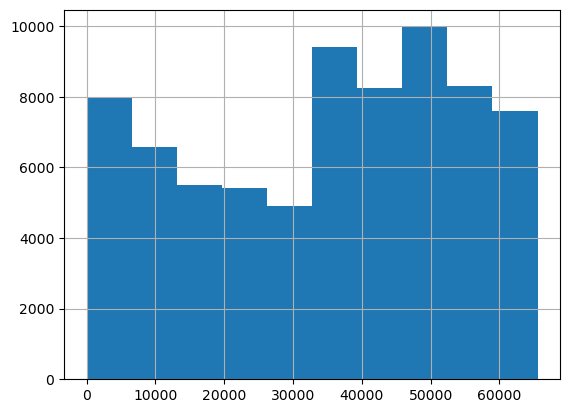

In [95]:
train['id.orig_p'].hist()

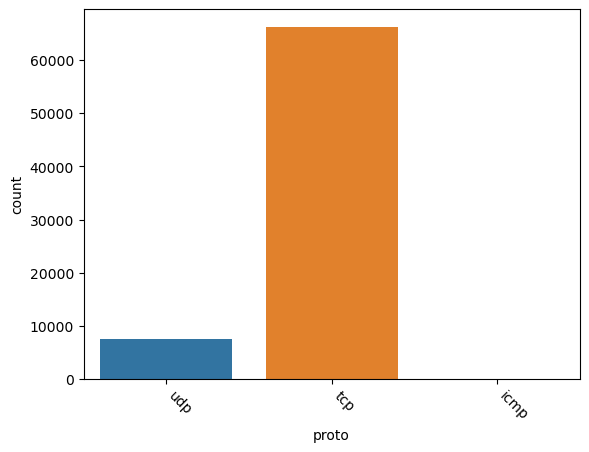

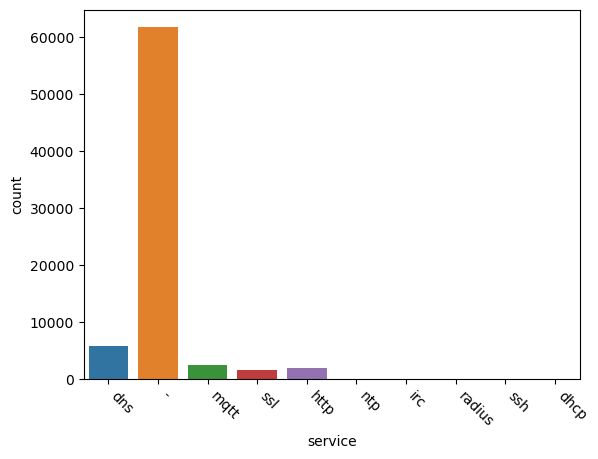

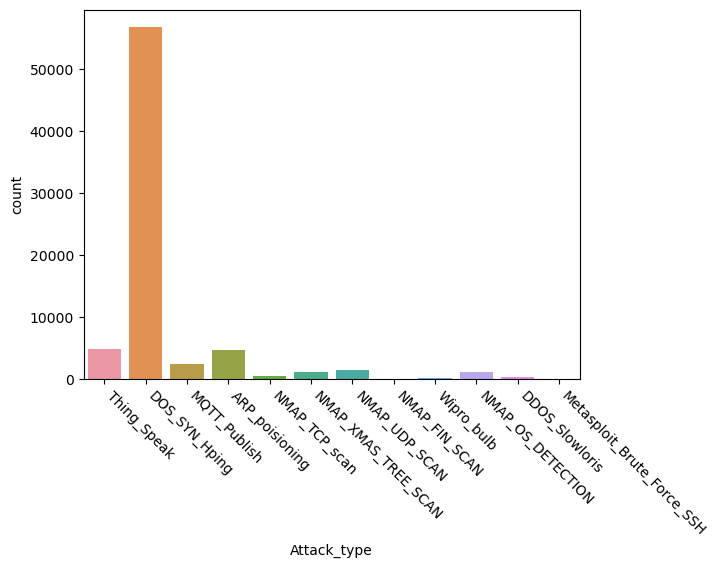

In [51]:
for col in train.columns:
    if train[col].dtype == "object":
        # plt.figure(figsize=(12,6))
        sns.countplot(train, x=col)
        plt.xticks(rotation=-45,ha="left")
        plt.show()